# Ford GoBike - Communicate Findings
## by Mohamed Algohary

## Investigation Overview

In this investigation, I want to look at users' behaviors and characteristics, specifically how the hour of the day, day of the week, users' type, age, and gender all impact the service usage. 

## Dataset Overview

The dataset used for this exploratory analysis consists of Bay Wheels's trip data for individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
# suppress warnings from final output
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("df_clean.csv")

## When is the service most used?

Service usage peaks at 8 AM through 9 AM and at 5 PM through 6 PM, which are the typical rush hours in the United States because of work schedules. This would also suggest that the service is primarily used by commuters.

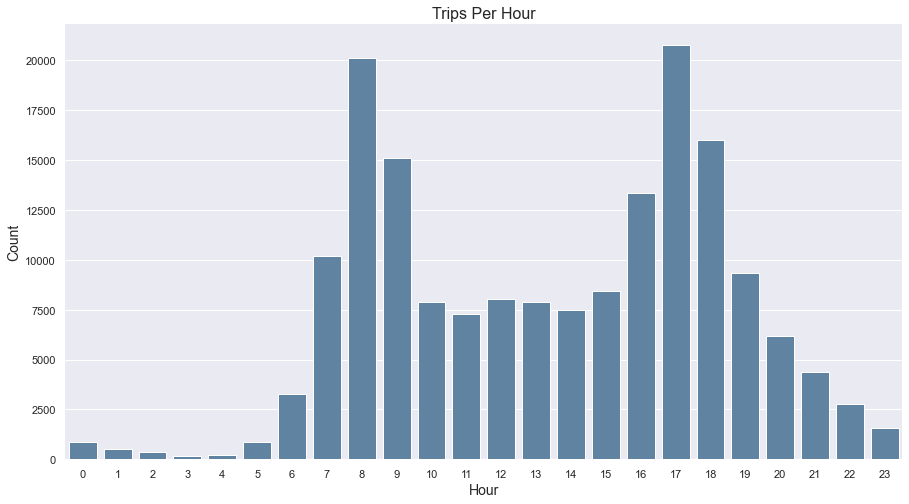

In [3]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.set_style("darkgrid")
sns.countplot(data=df, x="start_hour", color="#5584AC")
sns.despine(left=True, bottom=True)
plt.title("Trips Per Hour", fontdict={"fontsize": 16})
plt.xlabel("Hour", fontdict={"fontsize": 14})
plt.ylabel("Count", fontdict={"fontsize": 14});

## Which days see most service use?

Most of the trips are on weekdays, mainly during the midweek (Tuesday, Wednesday, Thursday), while weekends had the least trips. This enforces the idea that most of the service users are commuters.

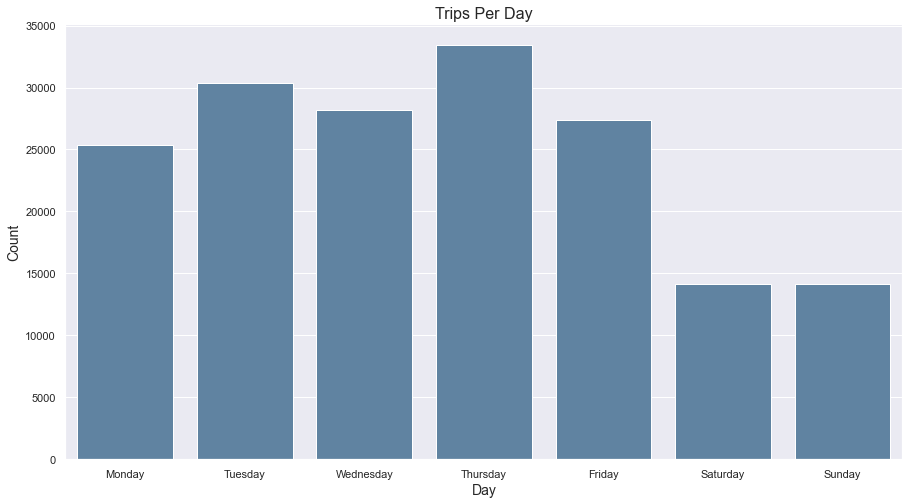

In [4]:
sns.countplot(
    data=df,
    x="start_dow",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    color="#5584AC",
)
plt.title("Trips Per Day", fontdict={"fontsize": 16})
plt.xlabel("Day", fontdict={"fontsize": 14})
plt.ylabel("Count", fontdict={"fontsize": 14});

## Which gender is more likely to use the service? Which gender is more likely to subscribe?

It is apparent that male users are more likely to use the service right now, since 75% of the trips were by male users, and it is safe to assume this will continue to be the case in the near future.

Male users are also slightly more likely to subscribe to the service.

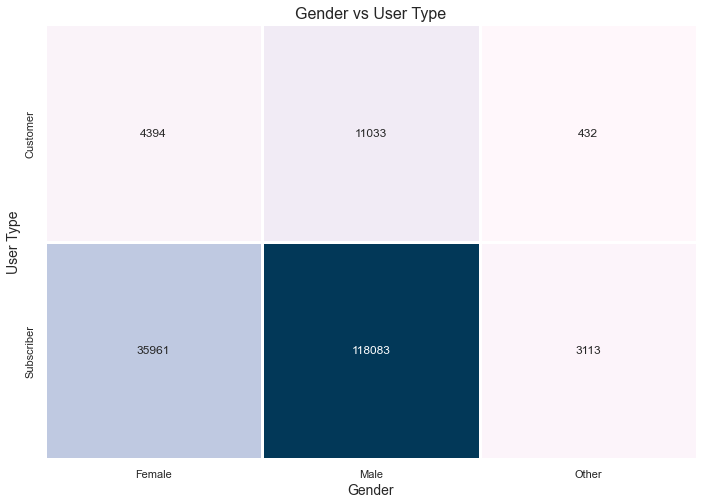

In [5]:
gender_vs_type = df.groupby("user_type")["member_gender"].value_counts().unstack()

# Plotting the heatmap
plt.title("Gender vs User Type", fontdict={"fontsize": 16})
sns.heatmap(
    gender_vs_type,
    cmap="PuBu",
    annot=True,
    fmt=".0f",
    annot_kws={"fontsize": 12},
    linewidth=3,
    square=True,
    cbar=False,
)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("User Type", fontsize=14);

## Which age group's trips are longer?

Average trip duration seems to increase slightly with increases in age. Overall, users who are 60 years old or more tend to take the most time on average.

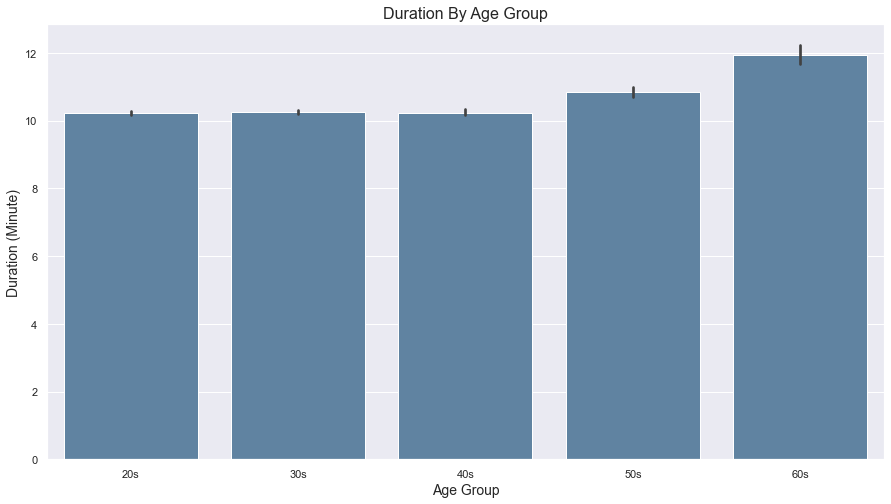

In [6]:
order = ["20s", "30s", "40s", "50s", "60s"]
sns.barplot(data=df, x="age_group", order=order, y="duration_min", color="#5584AC")
plt.title("Duration By Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Duration (Minute)", fontsize=14);

In [1]:
!jupyter nbconvert slides.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] Writing 670192 bytes to slides.slides.html
